In [2]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
# 读取数据
df=pd.read_csv('cleaned_data.csv',encoding='UTF-8')
df.columns

Index(['地铁', '总价', '单价', '建筑面积', '室', '厅', '毛坯', '简装', '精装', '东', '东北', '东南',
       '南', '西', '西北', '西南', '中楼层', '低楼层', '地下室', '底层', '顶层', '高楼层'],
      dtype='object')

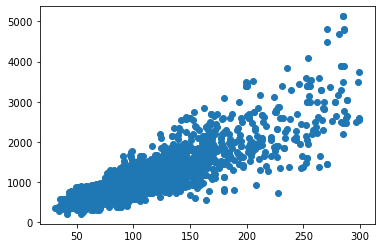

In [3]:
# 绘制建筑面积和总价的散点图
import matplotlib.pyplot as plt
df1=df[df['建筑面积']<=300] #筛选离群点
# print(df1.count())
area=df1[['建筑面积']]
price=df1[['总价']]
plt.scatter(area,price)
plt.show()

In [4]:
# 使用线性回归拟合
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
# 训练
model = linear.fit(area,price) #调用linear中fit方法，用面积预测房价
print(model.intercept_,model.coef_) #打印截距和回归系数

[-39.00618737] [[10.51990558]]


In [5]:
# 预测
price_ =model.predict(area)
# price_

地铁      2795
总价      2795
单价      2795
建筑面积    2795
室       2795
厅       2795
毛坯      2795
简装      2795
精装      2795
东       2795
东北      2795
东南      2795
南       2795
西       2795
西北      2795
西南      2795
中楼层     2795
低楼层     2795
地下室     2795
底层      2795
顶层      2795
高楼层     2795
dtype: int64


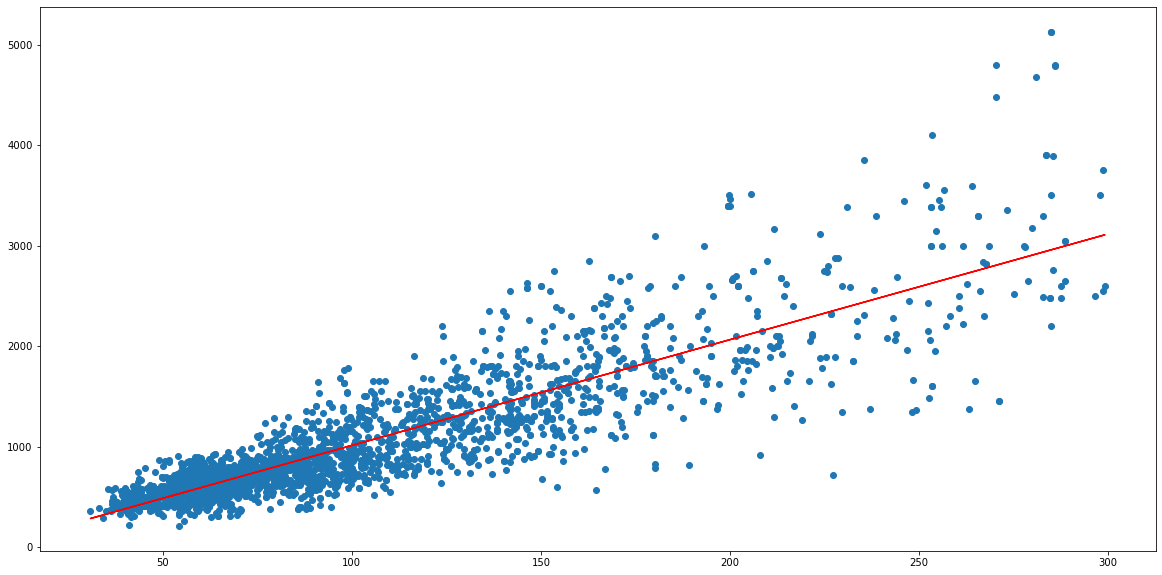

In [6]:
# 绘制建筑面积和总价的散点图
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
print(df1.count())
area=df1[['建筑面积']]
price=df1[['总价']]
plt.scatter(area,price)
plt.plot(area,price_,color='red')
plt.show()

In [7]:
# 上面利用的是单元线性回归，下面利用多元线性回归
cols=['地铁', '建筑面积', '室', '厅', '毛坯', '简装', '精装', '东', '东北', '东南',
       '南', '西', '西北', '西南', '中楼层', '低楼层', '地下室', '底层', '顶层', '高楼层']

In [8]:
X=df1[cols]
X.head()

,地铁,建筑面积,室,厅,毛坯,简装,精装,东,东北,东南,南,西,西北,西南,中楼层,低楼层,地下室,底层,顶层,高楼层
0,1.0,51.10,2.0,1.0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0
1,0.0,115.10,2.0,2.0,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0
2,1.0,69.30,3.0,1.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0
3,1.0,129.10,3.0,2.0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0
4,1.0,123.58,3.0,2.0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1


In [9]:
Y=df1['总价']
Y.head()

0     395.0
1    1330.0
2     690.0
3    1293.0
4     642.0
Name: 总价, dtype: float64

In [10]:
##############划分训练集和测试集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)
# print(x_train.count(),x_test.count())

In [11]:
print(len(y_train),'\r\n',len(y_test))

2236 
 559


In [12]:
# 多元线性回归
linear_multi=LinearRegression()
model=linear_multi.fit(x_train,y_train)


In [13]:
model.coef_ #打回归系数 w
[*zip(x_train.columns,model.coef_)]

[('地铁', 54.51290222477876),
 ('建筑面积', 9.991179433264561),
 ('室', 12.666428525569152),
 ('厅', 23.448723898802026),
 ('毛坯', 39.99790726595083),
 ('简装', -10.064912343884444),
 ('精装', 74.13986721472959),
 ('东', -15.036407319180471),
 ('东北', -49.14082938789587),
 ('东南', 33.16766326237844),
 ('南', 38.627674173860505),
 ('西', -11.255433641495275),
 ('西北', -30.952978988907297),
 ('西南', 34.59031190123984),
 ('中楼层', 37.31417415017353),
 ('低楼层', 39.90803345377005),
 ('地下室', -100.00010530844541),
 ('底层', 32.009718714565935),
 ('顶层', -33.693501181847104),
 ('高楼层', 24.46168017178295)]

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,X.columns.get_loc(i)) for i in X.columns]
[*zip(X.columns,vif)]

D:\Anaconda\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('地铁', 1.0124036672273953),
 ('建筑面积', 3.33115890445883),
 ('室', 2.6096119892703693),
 ('厅', 1.890458399311295),
 ('毛坯', 1.1581486795573015),
 ('简装', 3.6493681786700645),
 ('精装', 3.650877575155727),
 ('东', inf),
 ('东北', inf),
 ('东南', inf),
 ('南', inf),
 ('西', inf),
 ('西北', inf),
 ('西南', inf),
 ('中楼层', inf),
 ('低楼层', inf),
 ('地下室', inf),
 ('底层', inf),
 ('顶层', inf),
 ('高楼层', inf)]

In [15]:
model.intercept_#打印截距

-157.91836952099857

In [16]:
# 多元线性回归的截距和回归系数
predict_result=model.predict(x_test) #查看x_test预测情况

In [17]:
from sklearn.metrics import mean_squared_error as MSE
MSE(model.predict(x_test),y_test) #MSE在最大值和最小值之间，且比例为0.2，0.25

76779.84457302708

In [18]:
y_test.mean()

968.5232558139535

In [19]:
Y.max()

5127.0

In [20]:
Y.min()

210.0

In [21]:

score=model.score(x_test,y_test)
print('R-scores:',score)
# R-scores为0.6-0.7算比较好

R-scores: 0.8066191219243628


In [22]:
# 使用假设检验法，选出最相关的特征，用于预测
cols=['地铁', '建筑面积', '室', '厅', '毛坯', '简装', '精装', '东', '东北', '东南',
       '南', '西', '西北', '西南', '中楼层', '低楼层', '地下室', '底层', '顶层', '高楼层']
len(cols)

20

In [23]:
# 使用假设检验法
import statsmodels.api as sm
Y=df1['总价'].values
# 取出所有特征值的数据
X=df1[cols]
X_=sm.add_constant(X)
# 使用最小平方法,计算度量模型的性能值，判断模型好坏
result=sm.OLS(Y,X_)
# fit方法进行运算
summary=result.fit()
# 调用summary2方法，打印出假设检验的系列信息
print(summary.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.781     
Dependent Variable: y                AIC:                39676.7470
Date:               2022-07-09 17:28 BIC:                39789.5231
No. Observations:   2795             Log-Likelihood:     -19819.   
Df Model:           18               F-statistic:        555.5     
Df Residuals:       2776             Prob (F-statistic): 0.00      
R-squared:          0.783            Scale:              85047.    
--------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
--------------------------------------------------------------------
const      -101.5671   22.2197  -4.5710  0.0000  -145.1360  -57.9982
地铁           52.8246   11.1048   4.7569  0.0000    31.0501   74.5991
建筑面积         10.1254    0.1931  52.4445  0.0000     9.7468   10.5039
室            11.9361    9.5652   1.2479  0.2122    -6.8194  

y:因变量  
model：最小二乘法  
No. Observations：自变量数据个数（样本量）  
Df Residuals：残差自由度 （样本量-自变量个数-1)  
Df Model:模型自由度（自变量个数）  
F-statistic：F统计量  
Prob (F-statistic)：F统计量P值  
AIC：  
BIC:贝叶斯信息参数  
右边参数为对整体显著性水平进行检验  
Coef.    Std.Err.     t     P>|t|     [0.025    0.975]   
回归系数进行参数估计之后的结果  
Coef.回归系数，Std.Err.标准差，t回归系数t值

以下下为多元回归模型残差:要求残差符合正态分布  
Omnibus:          822.134   Durbin-Watson:      1.909              
Prob(Omnibus):    0.000     Jarque-Bera (JB):   8828.890           
Skew:             1.077     Prob(JB):           0.000  
Kurtosis:         11.436   

# #最小二乘法实现参数估计——估计自变量X的系数

In [24]:
# import itertools
# # 使用AIC，找出AIC最小的属性作为预测的特征属性
# # 寻找最小AIC的属性组合
# fileds=[ '地铁','建筑面积', '室', '厅', '毛坯', '简装', '精装', '东', '东北', '东南', '南',
#        '西', '西北', '西南', '中楼层', '低楼层', '地下室', '底层', '顶层', '高楼层']
# acis={}
# for i in range(1,len(fileds)+1):
#     for virables in itertools.combinations(fileds,i):
#         x1=sm.add_constant(df1[list(virables)])
#         x2=sm.OLS(Y,x1)
#         res=x2.fit()
#         acis[virables]=res.aic

In [25]:
# # 使用collections 里面的Counter，对字典进行统计
# from collections import Counter
# counter=Counter(acis)
# # 倒叙取出最后10个特征组合
# counter.most_common()[::-10] 

In [26]:
cols2=['地铁', '建筑面积', '精装', '东南', '南', '西南', '地下室', '顶层']
# 划分训练集和测试集
X=df1[cols2]
Y=df1['总价']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)
# 多元线性回归
linear_multi=LinearRegression()
model1=linear_multi.fit(x_train,y_train)
print(model1.intercept_,model1.coef_)
print(model1.score(x_test,y_test))

-132.30351820838064 [  53.70626133   10.33094903   80.63801936   60.61750186   68.21276158
   61.20639148 -132.0271077   -63.6949804 ]
0.8074882826517968


# #模型评估指标

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
predict=model1.predict(x_test)
print('R-squares:%s'%(r2_score(y_test,model1.predict(x_test))))  #r2_score真实值在前预测值在后
print('MAE:%s'%(mean_absolute_error(model1.predict(x_test),y_test)))
print('MSE:%s'%(mean_squared_error(model1.predict(x_test),y_test)))

R-squares:0.8074882826517968
MAE:176.56014025093478
MSE:76434.75344392766


In [29]:
Y.max()

5127.0

In [30]:
Y.min()

210.0

In [31]:
# cross_val_score(model1,X,Y,cv=10,scoring="mean_squared_error")

In [32]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())
cross_val_score(model1,X,Y,cv=10,scoring="neg_mean_squared_error")*(-1)

array([ 51811.26384971,  34831.5547238 ,  71690.44245707,  37312.01439124,
       117046.620615  , 193088.80778224, 176727.13000199,  47222.54356413,
        38229.15551453,  90290.05359422])

In [33]:
sorted(y_test)

[297.0,
 330.0,
 335.0,
 340.0,
 353.0,
 359.0,
 365.0,
 370.0,
 372.0,
 380.0,
 385.0,
 392.0,
 395.0,
 396.0,
 398.0,
 399.0,
 403.0,
 405.0,
 405.0,
 409.0,
 410.0,
 410.0,
 410.0,
 413.0,
 419.0,
 419.0,
 420.0,
 420.0,
 425.0,
 426.0,
 429.0,
 430.0,
 435.0,
 445.0,
 445.0,
 449.0,
 449.0,
 450.0,
 450.0,
 450.0,
 450.0,
 453.0,
 453.0,
 455.0,
 455.0,
 458.0,
 459.0,
 460.0,
 460.0,
 460.0,
 463.5,
 465.0,
 466.0,
 466.0,
 468.0,
 470.0,
 473.0,
 480.0,
 480.0,
 480.0,
 483.0,
 486.0,
 488.0,
 488.0,
 489.0,
 490.0,
 495.0,
 497.0,
 498.0,
 498.0,
 498.0,
 499.0,
 499.0,
 501.2,
 505.0,
 505.0,
 508.0,
 508.0,
 508.0,
 508.0,
 510.0,
 511.0,
 515.0,
 517.0,
 520.0,
 520.0,
 520.0,
 523.0,
 524.0,
 525.0,
 525.0,
 528.0,
 530.0,
 530.0,
 532.0,
 535.0,
 535.0,
 535.0,
 535.0,
 538.0,
 538.0,
 538.0,
 539.0,
 539.0,
 540.0,
 543.0,
 543.0,
 545.0,
 545.0,
 545.0,
 545.0,
 546.0,
 548.0,
 549.0,
 550.0,
 550.0,
 550.0,
 550.0,
 550.0,
 550.0,
 555.0,
 555.0,
 555.0,
 555.0,
 558.0,


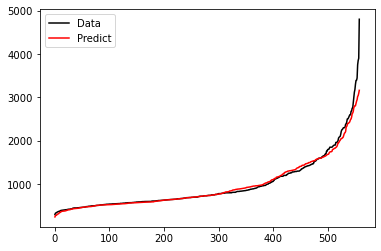

In [34]:
plt.plot(range(len(y_test)),sorted(y_test),c='black',label='Data')
plt.plot(range(len(predict)),sorted(predict),c='red',label='Predict')
plt.legend()
plt.show()

In [39]:
# F检验，理论F值
from scipy.stats import f
F_Theroy = f.ppf(q=0.95,dfn = 18,dfd = 2776)
print(F_Theroy)

1.6075685737967023


In [36]:
# 使用假设检验法
import statsmodels.api as sm
Y=df1['总价'].values
# 取出所有特征值的数据
X=df1[cols2]
x_model=sm.add_constant(X)
# 使用最小平方法,计算度量模型的性能值，判断模型好坏
result=sm.OLS(Y,x_model)
# fit方法进行运算
summary=result.fit()
# 调用summary2方法，打印出假设检验的系列信息
print(summary.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.782     
Dependent Variable: y                AIC:                39663.3448
Date:               2022-07-09 17:28 BIC:                39716.7651
No. Observations:   2795             Log-Likelihood:     -19823.   
Df Model:           8                F-statistic:        1251.     
Df Residuals:       2786             Prob (F-statistic): 0.00      
R-squared:          0.782            Scale:              84942.    
--------------------------------------------------------------------
             Coef.    Std.Err.     t     P>|t|     [0.025    0.975] 
--------------------------------------------------------------------
const      -126.5837   17.1368  -7.3866  0.0000  -160.1859  -92.9815
地铁           51.6448   11.0570   4.6708  0.0000    29.9640   73.3256
建筑面积         10.3469    0.1089  95.0300  0.0000    10.1334   10.5604
精装           80.4289   11.1511   7.2126  0.0000    58.5635  

In [37]:
# # 1.最小二乘法实现参数估计——估计自变量X的系数
# # # 回归系数的计算，x转置乘以x，对点击求逆之后，乘以转置，最后点乘y
# beta_hat=np.dot(np.dot(np.linalg.inv(np.dot(x_model.T,x_model)),x_model.T),Y)
# print('回归系数：',np.round(beta_hat,4))
# print('回归方程: y_hat=%0.4f+%0.4f*x1+%0.4f*x2+%0.4f*x3+%0.4f*x4+%0.4f*x5+%0.4f*x6+%0.4f*x7+%0.4f*x8'%(beta_hat[0],beta_hat[1],beta_hat[2],beta_hat[3],beta_hat[4],beta_hat[5],beta_hat[6],beta_hat[7],beta_hat[8]))

In [38]:
# # 2.R方与调整后R方与下文中的各种统计量一起来检验回归方程的显著性
# y_hat=np.dot(x_model,beta_hat) #回归值的计算
# y=Y
# y_mean=np.mean(y)
# sst=sum((y-y_mean)**2) #总平方和
# ssr=sum((y_hat-y_mean)**2)
# sse=sum((y-y_hat)**2)
# R_squared=1-sse/sst
# print('R方：',round(R_squared,3))
# # 调整后 平方和
# adjR_squared=1-(sse/(100-3-1))/(sst/(100-1))
# print('调整之后R方：',round(adjR_squared,3))

NameError: name 'beta_hat' is not defined

In [ ]:
import scipy
F=(ssr/3)/(sse/(100-3-1))
F_p=scipy.stats.f.sf(F,3,96)
print(F)
print(F_p)
# P值越小，显著性越高

In [ ]:
#回归方程的t检验
# （1）t检验：beta_hat[i](相应的回归系数)/相应系数标准差
# （2）使用scipy.stats.t.sf残存函数
# 等于：1-累积分布函数
# 由于对t的绝对值进行检验，因此需要乘以2，p<-t,p>t

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,X.columns.get_loc(i)) for i in X.columns]
[*zip(X.columns,vif)]
